In [13]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

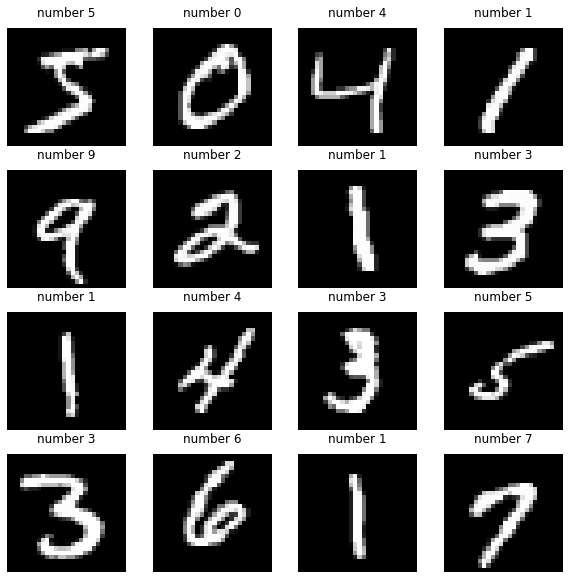

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs=plt.subplots(4,4,figsize=(10,10))
plt.gray()
for i,ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('number {}'.format(y_train[i]))
fig.show()

In [15]:
x_train =x_train.reshape(x_train.shape[0],28,28,1)
x_test =x_test.reshape(x_test.shape[0],28,28,1)
input_shape =(28,28,1)

In [16]:
x_train =x_train.astype('float32')
x_test =x_test.astype('float32')
x_train /=255
x_test /=255
print('x_train shape:', x_train.shape)
print('number of images in x_train',x_train.shape[0])
print('number of images in x_test',x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
number of images in x_train 60000
number of images in x_test 10000


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten, MaxPooling2D
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0870 - accuracy: 0.9734
Epoch 2/4
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0570 - accuracy: 0.9820
Epoch 3/4
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0423 - accuracy: 0.9863
Epoch 4/4
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0364 - accuracy: 0.9886


In [25]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0516 - accuracy: 0.9848


[0.051592353731393814, 0.9847999811172485]